<a href="https://colab.research.google.com/github/AbhyanandSharma2005/ML-model-practice-on-real-data/blob/main/HierarchalClustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

--- Original Iris Data (First 5 Rows) ---
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  

Shape of data: (150, 4)

--- Scaled Iris Data (First 5 Rows) ---
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0          -0.900681          1.019004          -1.340227         -1.315444
1          -1.143017         -0.131979          -1.340227         -1.315444
2          -1.385353          0.328414          -1.397064         -1.315444
3          -1.506521          0.098217   

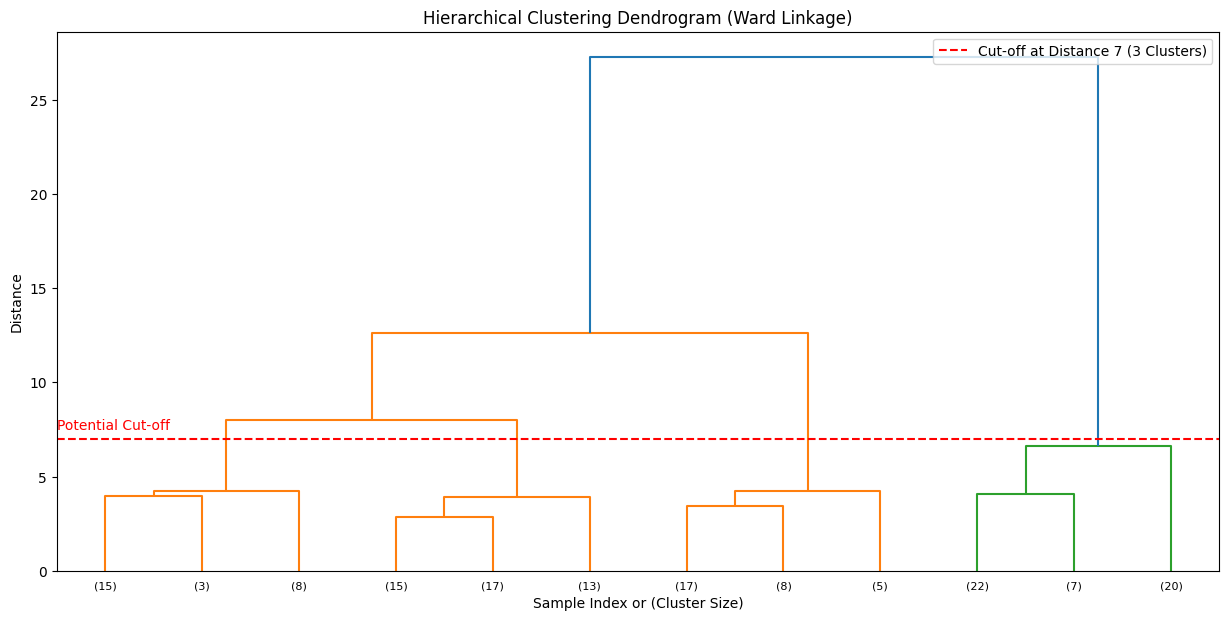


--- Clusters obtained by cutting at distance 7.0: 4 clusters ---
Cluster assignments: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 2 1 1 1 1 1 1 1 1 3 3 3 2 3 2 3 2 3 2 2 3 2 3 2 3 2 2 2 2 3 3 3 3
 3 3 3 3 3 2 2 2 2 3 2 3 3 2 2 2 2 3 2 2 2 2 2 3 2 2 4 3 4 3 3 4 2 4 3 4 4
 3 4 3 3 4 3 4 4 2 4 3 4 3 4 4 3 3 3 4 4 4 3 3 3 4 4 3 3 4 4 4 3 4 4 4 3 3
 4 3]

--- Clusters obtained by specifying 3 clusters: 3 clusters ---
Cluster assignments: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 2 1 1 1 1 1 1 1 1 3 3 3 2 3 2 3 2 3 2 2 3 2 3 2 3 2 2 2 2 3 3 3 3
 3 3 3 3 3 2 2 2 2 3 2 3 3 2 2 2 2 3 2 2 2 2 2 3 2 2 3 3 3 3 3 3 2 3 3 3 3
 3 3 3 3 3 3 3 3 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3]

--- Cross-tabulation of Actual Species vs. Predicted Clusters ---
cluster_label   1   2   3
species                  
setosa         49   1   0
versicolor      0  27  23
virginica       0   2  48


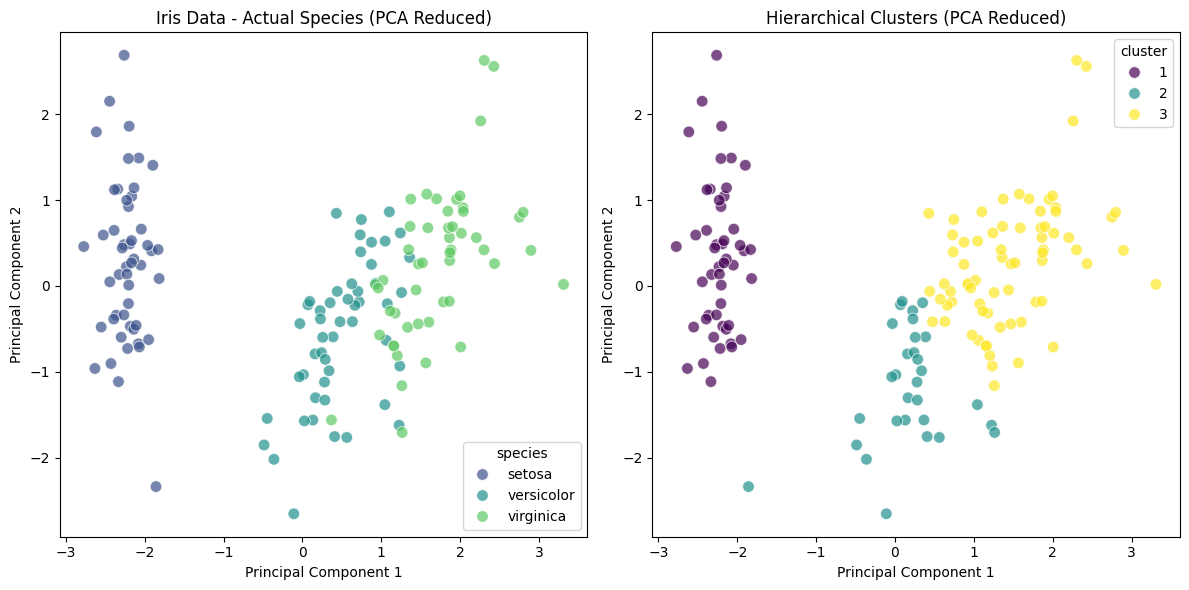


--- Clustering Evaluation Metrics (assuming 3 clusters) ---
Adjusted Rand Score (ARS): 0.6153
Homogeneity Score (HS): 0.6579

(ARS and HS range from -1 to 1, where 1 is a perfect match)


In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.metrics import adjusted_rand_score, homogeneity_score

iris = load_iris()
X = iris.data
y = iris.target

df = pd.DataFrame(X, columns=iris.feature_names)
df['species'] = iris.target_names[y]

print("--- Original Iris Data (First 5 Rows) ---")
print(df.head())
print("\nShape of data:", X.shape)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("\n--- Scaled Iris Data (First 5 Rows) ---")
print(pd.DataFrame(X_scaled, columns=iris.feature_names).head())

linked = linkage(X_scaled, method='ward')

print(f"\n--- Linkage Array Shape: {linked.shape} ---")
print("First 5 merges in linkage array:\n", linked[:5])

plt.figure(figsize=(15, 7))
plt.title('Hierarchical Clustering Dendrogram (Ward Linkage)')
plt.xlabel('Sample Index or (Cluster Size)')
plt.ylabel('Distance')
dendrogram(
    linked,
    orientation='top',
    labels=iris.target,
    distance_sort='descending',
    show_leaf_counts=True,
    leaf_font_size=8,
    truncate_mode='lastp',
    p=12
)
plt.axhline(y=7, color='r', linestyle='--', label='Cut-off at Distance 7 (3 Clusters)')
plt.text(x=0, y=7.5, s='Potential Cut-off', color='r')
plt.legend()
plt.show()

distance_threshold = 7.0
clusters_dist = fcluster(linked, distance_threshold, criterion='distance')
n_clusters_dist = len(np.unique(clusters_dist))
print(f"\n--- Clusters obtained by cutting at distance {distance_threshold}: {n_clusters_dist} clusters ---")
print("Cluster assignments:", clusters_dist)

n_clusters_expected = 3
clusters_n = fcluster(linked, n_clusters_expected, criterion='maxclust')
print(f"\n--- Clusters obtained by specifying {n_clusters_expected} clusters: {len(np.unique(clusters_n))} clusters ---")
print("Cluster assignments:", clusters_n)

df['cluster_label'] = clusters_n

print("\n--- Cross-tabulation of Actual Species vs. Predicted Clusters ---")
print(pd.crosstab(df['species'], df['cluster_label']))

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

df_pca = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
df_pca['cluster'] = df['cluster_label']
df_pca['species'] = df['species']

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x='PC1', y='PC2', hue='species', data=df_pca, palette='viridis', s=70, alpha=0.7)
plt.title('Iris Data - Actual Species (PCA Reduced)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.subplot(1, 2, 2)
sns.scatterplot(x='PC1', y='PC2', hue='cluster', data=df_pca, palette='viridis', s=70, alpha=0.7, legend='full')
plt.title('Hierarchical Clusters (PCA Reduced)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.tight_layout()
plt.show()

ars = adjusted_rand_score(y, clusters_n)
hs = homogeneity_score(y, clusters_n)

print(f"\n--- Clustering Evaluation Metrics (assuming 3 clusters) ---")
print(f"Adjusted Rand Score (ARS): {ars:.4f}")
print(f"Homogeneity Score (HS): {hs:.4f}")
print("\n(ARS and HS range from -1 to 1, where 1 is a perfect match)")